<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [253]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import re

pd.options.display.max_columns = None
pd.options.display.max_rows = 20


In [254]:
cols = set(df.columns)
print('Колонок:', len(df.columns))
print('Есть ли ЗП (руб):', 'ЗП (руб)' in cols)
print('Есть ли ЗП:', 'ЗП' in cols)
print(sorted(df.columns))


Колонок: 13
Есть ли ЗП (руб): False
Есть ли ЗП: True
['Авто', 'Город, переезд, командировки', 'График', 'ЗП', 'Занятость', 'Ищет работу на должность:', 'Обновление резюме', 'Образование и ВУЗ', 'Опыт работы', 'Опыт работы (месяц)', 'Пол, возраст', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [255]:
DATA_PATH = Path('dst-3.0_16_1_hh_database.csv')

df = pd.read_csv(DATA_PATH, sep=';')
df_raw = df.copy(deep=True)

rows, cols = df.shape
print(f'Размерность таблицы: {rows} строк × {cols} столбцов')


Размерность таблицы: 44744 строк × 12 столбцов


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [256]:
display(df.head())
display(df.tail())

df['Пол, возраст'].head()


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


0      Мужчина ,  39 лет , родился 27 ноября 1979
1       Мужчина ,  60 лет , родился 20 марта 1959
2    Женщина ,  36 лет , родилась 12 августа 1982
3        Мужчина ,  38 лет , родился 25 июня 1980
4       Женщина ,  26 лет , родилась 3 марта 1993
Name: Пол, возраст, dtype: object

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [258]:
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]


Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [259]:
display(df.describe())
display(df.describe(include='object'))

experience_unique = df['Опыт работы'].nunique()
top_job = df['Ищет работу на должность:'].value_counts().idxmax()

print(f"Уникальных значений в 'Опыт работы': {experience_unique}")
print(f"Самая распространённая искомая должность: {top_job}")


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Уникальных значений в 'Опыт работы': 44413
Самая распространённая искомая должность: Системный администратор


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [260]:
def normalize_text(value: str) -> str:
    """Lowercase helper that also strips spaces and normalizes ё."""
    return (
        value.replace(' ', ' ')
        .replace(' ', ' ')
        .strip()
        .lower()
        .replace('ё', 'е')
    )

education_patterns = [
    ('неоконченное высшее', 'неоконченное высшее'),
    ('среднее специальное', 'среднее специальное'),
    ('высшее', 'высшее'),
    ('среднее', 'среднее'),
]

def extract_education(value: str):
    if pd.isna(value):
        return np.nan
    baseline = normalize_text(value)
    for needle, label in education_patterns:
        if baseline.startswith(needle):
            return label
    return np.nan


df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)

education_counts = df['Образование'].value_counts(dropna=False)
display(education_counts)

middle_edu = education_counts.get('среднее', 0)
print(f'Число соискателей со средним образованием: {middle_edu}')

df.drop(columns=['Образование и ВУЗ'], inplace=True)


Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

Число соискателей со средним образованием: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [261]:
gender_map = {'мужчина': 'М', 'женщина': 'Ж'}
age_pattern = re.compile(r'(\d+)\s+(?:лет|года|год)')

def extract_gender(value: str):
    if pd.isna(value):
        return np.nan
    first_part = value.split(',')[0]
    return gender_map.get(normalize_text(first_part))

def extract_age(value: str):
    if pd.isna(value):
        return np.nan
    match = age_pattern.search(value)
    return int(match.group(1)) if match else np.nan


df['Пол'] = df['Пол, возраст'].apply(extract_gender)
df['Возраст'] = df['Пол, возраст'].apply(extract_age).astype('Int64')

women_share = round(df['Пол'].eq('Ж').mean() * 100, 2)
mean_age = round(df['Возраст'].mean(), 1)

print(f'Доля женских резюме: {women_share}%')
print(f'Средний возраст: {mean_age}')

df.drop(columns=['Пол, возраст'], inplace=True)


Доля женских резюме: 19.07%
Средний возраст: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [262]:
exp_year_pattern = re.compile(r'(\d+)\s+(?:год|года|лет)')
exp_month_pattern = re.compile(r'(\d+)\s+(?:месяц|месяца|месяцев)')

def parse_experience(value: str):
    if pd.isna(value):
        return np.nan
    normalized = normalize_text(value)
    if not normalized or normalized == 'не указано':
        return np.nan
    main_part = normalized.split(',')[0]
    years = exp_year_pattern.search(main_part)
    months = exp_month_pattern.search(main_part)
    total = 0
    if years:
        total += int(years.group(1)) * 12
    if months:
        total += int(months.group(1))
    return total if total > 0 else np.nan


df['Опыт работы (месяц)'] = df['Опыт работы'].apply(parse_experience)

median_experience = df['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы: {median_experience:.0f} месяцев')

df.drop(columns=['Опыт работы'], inplace=True)


Медианный опыт работы: 100 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [263]:
MILLION_CITIES = {
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск',
    'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Волгоград', 'Воронеж'
}

def normalize_text(v: str) -> str:
    return str(v).replace('\xa0', ' ').strip().lower()


move_negative = re.compile(r'не готов\w*\s+к\s+переез')

trip_negative = re.compile(r'не готов\w*\s+к\s+(?:редким\s+)?командиров')

def categorize_city(value: str) -> str:
    if pd.isna(value):
        return 'другие'
    city = str(value).split(',')[0].strip()  
    if city == 'Москва':
        return 'Москва'
    if city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    if city in MILLION_CITIES:
        return 'город-миллионник'
    return 'другие'

def parse_move_flag(value: str) -> bool:
    
    if pd.isna(value):
        return False
    text = normalize_text(value)
    
    return not bool(move_negative.search(text))

def parse_trip_flag(value: str) -> bool:
    
    if pd.isna(value):
        return False
    text = normalize_text(value)
    
    return not bool(trip_negative.search(text))


df['Город'] = df['Город, переезд, командировки'].apply(categorize_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(parse_move_flag)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(parse_trip_flag)


spb_share = round(df['Город'].eq('Санкт-Петербург').mean() * 100)
mobile_share = round((df['Готовность к переезду'] & df['Готовность к командировкам']).mean() * 100)

print(f'Санкт-Петербург: {spb_share}%')
print(f'Готовы и к переезду, и к командировкам: {mobile_share}%')


df.drop(columns=['Город, переезд, командировки'], inplace=True, errors='ignore')


Санкт-Петербург: 11%
Готовы и к переезду, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [264]:
employment_categories = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'волонтерство',
    'стажировка',
]

schedule_categories = [
    'полный день',
    'сменный график',
    'гибкий график',
    'удаленная работа',
    'вахтовый метод',
]

def add_multi_hot_features(source: pd.Series, categories, prefix: str) -> pd.DataFrame:
    normalized = source.fillna('').astype(str).str.lower()
    out = pd.DataFrame(index=source.index)
    for category in categories:
        col = f"{prefix}_{category.replace(' ', '_')}"
        out[col] = normalized.str.contains(category, regex=False)
    return out


emp_ohe = add_multi_hot_features(df_raw['Занятость'], employment_categories, 'Занятость')
sch_ohe = add_multi_hot_features(df_raw['График'], schedule_categories, 'График')

new_cols = pd.concat([emp_ohe, sch_ohe], axis=1)


df[new_cols.columns] = new_cols


project_volunteer = (df['Занятость_проектная_работа'] & df['Занятость_волонтерство']).sum()
flexible_shift = (df['График_гибкий_график'] & df['График_сменный_график']).sum()

print("Проектная работа и волонтерство:", project_volunteer)
print("Гибкий и сменный график:", flexible_shift)


df.drop(columns=['Занятость', 'График'], inplace=True, errors='ignore')


Проектная работа и волонтерство: 436
Гибкий и сменный график: 9819


In [265]:
df_5 = df.copy(deep=True)


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [266]:
import numpy as np
import pandas as pd

df = df_5.copy(deep=True)

rates = pd.read_csv('ExchangeRates.csv', sep=',')
rates = rates[['currency', 'date', 'close', 'proportion']].copy()
rates['date'] = pd.to_datetime(rates['date'], format='%d/%m/%y', errors='coerce').dt.date
rates['close'] = pd.to_numeric(rates['close'], errors='coerce')
rates['proportion'] = pd.to_numeric(rates['proportion'], errors='coerce').replace(0, np.nan)

df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True, errors='coerce')
df['date'] = df['Обновление резюме'].dt.date

salary_raw = df['ЗП'].astype(str).str.replace('\xa0', ' ', regex=False).str.strip()
amount_str = salary_raw.str.extract(r'([\d\s]+)', expand=False)
df['salary_amount'] = pd.to_numeric(amount_str.str.replace(' ', '', regex=False), errors='coerce')
df['salary_curr_raw'] = salary_raw.str.extract(r'([A-Za-zА-Яа-я.]+)', expand=False)


curr_map = {
    'руб.': 'RUB', 'руб': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'грн.': 'UAH', 'грн': 'UAH',
    'бел.руб.': 'BYN', 'бел. руб.': 'BYN', 'белруб.': 'BYN',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN',
}

df['currency'] = df['salary_curr_raw'].map(curr_map)

df = df.merge(rates, how='left', left_on=['date', 'currency'], right_on=['date', 'currency'])

rub_mask = df['currency'].eq('RUB')
df.loc[rub_mask, 'close'] = 1.0
df.loc[rub_mask, 'proportion'] = 1.0

df['ЗП (руб)'] = df['salary_amount'] * df['close'] / df['proportion']

answer = round(df['ЗП (руб)'].median() / 1000)

df.drop(columns=['ЗП', 'salary_amount', 'salary_curr_raw', 'currency', 'close', 'proportion', 'date'], inplace=True, errors='ignore')

answer


59

Сверка

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  Int64         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода: 30 лет (2834 резюме)
Диапазон: 14 — 100 лет
50% резюме находятся в интервале 27–36 лет
Количество аномалий (>50 лет): 1774


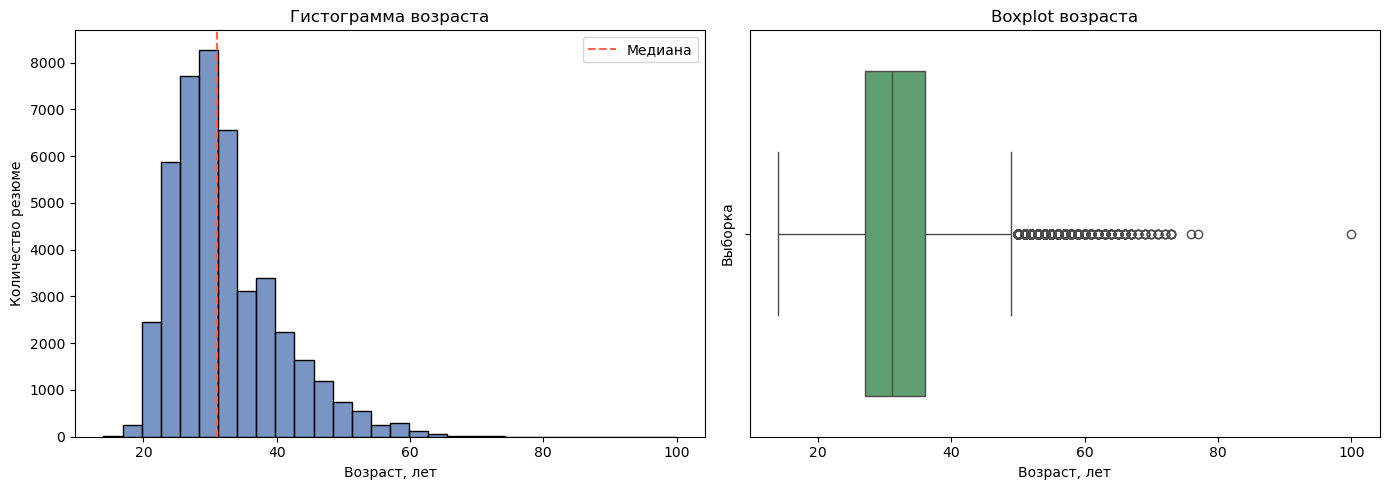

In [268]:
age_data = df['Возраст'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(age_data, bins=30, ax=axes[0], color='#4C72B0')
axes[0].axvline(age_data.median(), color='tomato', linestyle='--', label='Медиана')
axes[0].set_title('Гистограмма возраста')
axes[0].set_xlabel('Возраст, лет')
axes[0].set_ylabel('Количество резюме')
axes[0].legend()

sns.boxplot(x=age_data, ax=axes[1], color='#55A868')
axes[1].set_title('Boxplot возраста')
axes[1].set_xlabel('Возраст, лет')
axes[1].set_ylabel('Выборка')

plt.tight_layout()

age_mode = age_data.mode().iloc[0]
mode_count = (age_data == age_mode).sum()
age_min, age_max = int(age_data.min()), int(age_data.max())
q1, q3 = age_data.quantile([0.25, 0.75])
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
outliers = age_data[age_data > upper_whisker]

print(f'Мода: {age_mode} лет ({mode_count} резюме)')
print(f'Диапазон: {age_min} — {age_max} лет')
print(f'50% резюме находятся в интервале {q1:.0f}–{q3:.0f} лет')
print(f'Количество аномалий (>{upper_whisker:.0f} лет): {len(outliers)}')


Возраст распределён правосторонне: мода — 30 лет (2834 резюме), 50% наблюдений лежат в интервале 27–36 лет. Диапазон значений — 14–100 лет. По правилу 1.5 IQR верхний ус ~49.5 года; выше этого порога 1774 резюме, а старше 60 лет — 171. Основная масса соискателей — 25–40 лет.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода: 81.0 месяцев (~6.8 лет)
Медиана: 100 месяцев (~8.3 лет)
Диапазон: 1 — 1188 месяцев
IQR: 57–154 месяцев
Аномалии (>300 месяцев): 1276 записей


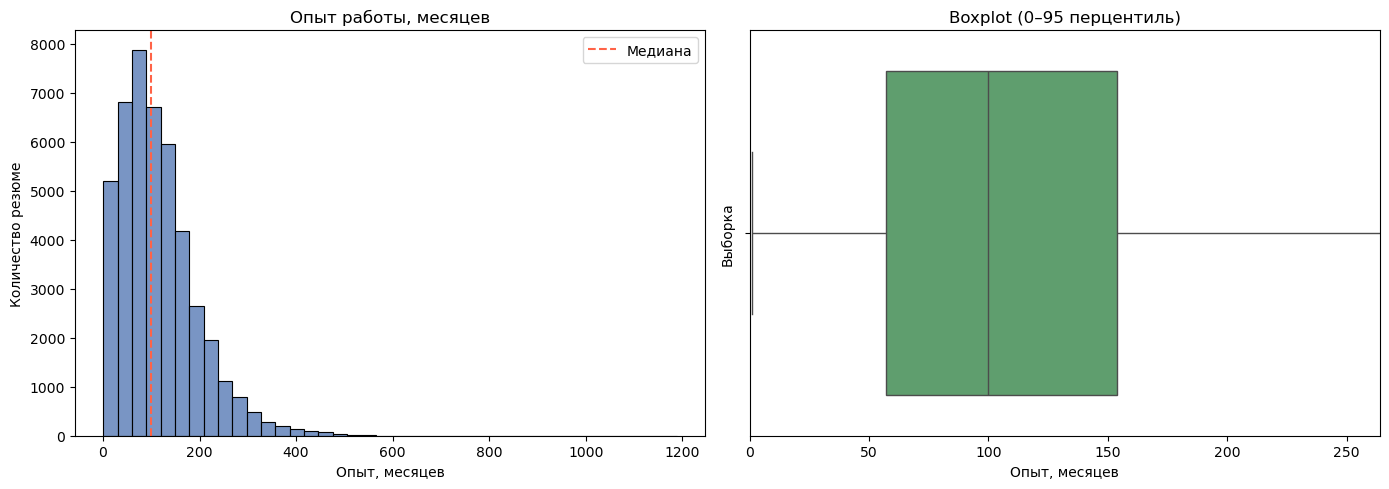

In [269]:
experience_data = df['Опыт работы (месяц)'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(experience_data, bins=40, ax=axes[0], color='#4C72B0')
axes[0].axvline(experience_data.median(), color='tomato', linestyle='--', label='Медиана')
axes[0].set_title('Опыт работы, месяцев')
axes[0].set_xlabel('Опыт, месяцев')
axes[0].set_ylabel('Количество резюме')
axes[0].legend()

sns.boxplot(x=experience_data, ax=axes[1], color='#55A868')
axes[1].set_xlabel('Опыт, месяцев')
axes[1].set_ylabel('Выборка')
axes[1].set_xlim(0, experience_data.quantile(0.95))
axes[1].set_title('Boxplot (0–95 перцентиль)')

plt.tight_layout()

exp_mode = experience_data.mode().iloc[0]
exp_min, exp_max = int(experience_data.min()), int(experience_data.max())
q1, q3 = experience_data.quantile([0.25, 0.75])
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
print(f'Мода: {exp_mode} месяцев (~{exp_mode/12:.1f} лет)')
print(f'Медиана: {experience_data.median():.0f} месяцев (~{experience_data.median()/12:.1f} лет)')
print(f'Диапазон: {exp_min} — {exp_max} месяцев')
print(f'IQR: {q1:.0f}–{q3:.0f} месяцев')
print(f'Аномалии (>{upper_whisker:.0f} месяцев): {(experience_data > upper_whisker).sum()} записей')


Опыт работы также правосторонний: мода — 81 месяц (~6.8 года), медиана — 100 месяцев (~8.3 года). Половина соискателей имеет 57–154 месяцев (~4.8–12.8 лет) стажа. Диапазон значений — 1–1188 месяцев, верхний ус по 1.5 IQR — около 300 месяцев (~25.0 лет), выше этого значения 1276 резюме, формирующих хвост распределения.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Диапазон: 1 — 24304876 руб.
Медиана: 59019 руб.
IQR: 37082–95000 руб.
Доля запросов >1 млн руб.: 0.01%
Число запросов >1 млн руб.: 5


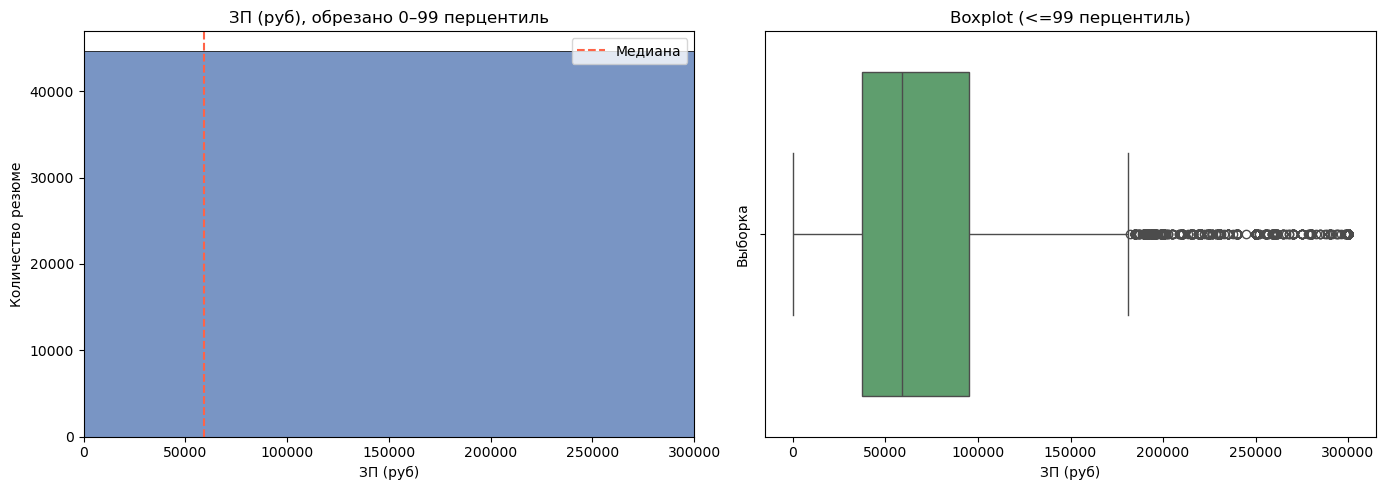

In [270]:
salary_data = df['ЗП (руб)'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
trim_limit = salary_data.quantile(0.99)
sns.histplot(salary_data, bins=60, ax=axes[0], color='#4C72B0')
axes[0].set_xlim(0, trim_limit)
axes[0].axvline(salary_data.median(), color='tomato', linestyle='--', label='Медиана')
axes[0].set_title('ЗП (руб), обрезано 0–99 перцентиль')
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('Количество резюме')
axes[0].legend()

sns.boxplot(x=salary_data.clip(upper=trim_limit), ax=axes[1], color='#55A868')
axes[1].set_xlabel('ЗП (руб)')
axes[1].set_ylabel('Выборка')
axes[1].set_title('Boxplot (<=99 перцентиль)')

plt.tight_layout()

q1, q3 = salary_data.quantile([0.25, 0.75])
count_over_1m = (salary_data > 1_000_000).sum()
print(f'Диапазон: {salary_data.min():.0f} — {salary_data.max():.0f} руб.')
print(f'Медиана: {salary_data.median():.0f} руб.')
print(f'IQR: {q1:.0f}–{q3:.0f} руб.')
print(f'Доля запросов >1 млн руб.: {(salary_data > 1_000_000).mean():.2%}')
print(f'Число запросов >1 млн руб.: {count_over_1m}')


Зарплатные ожидания с длинным правым хвостом: медиана — 59 019 руб., IQR — 37 082–95 000 руб. Минимум — 1 руб., максимум — 24 304 876 руб. 99-й перцентиль около 300 тыс. руб., доля запросов выше 1 млн руб. — ~0.01% (5 резюме).


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [271]:
import plotly.express as px

salary_filtered = df[df['ЗП (руб)'] < 1_000_000].copy()

median_by_edu = (
    salary_filtered
    .groupby('Образование', as_index=False)['ЗП (руб)']
    .median()
    .sort_values('ЗП (руб)', ascending=False)
)

display(median_by_edu)

fig = px.bar(
    median_by_edu,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная ЗП по уровню образования (<1 млн руб.)'
)
fig.show()


,Образование,ЗП (руб)
0,высшее,60000.0
1,неоконченное высшее,50000.0
2,среднее,40000.0
3,среднее специальное,40000.0


Медианные значения: высшее образование — 60 тыс. руб., неоконченное высшее — 50 тыс. руб., среднее и среднее специальное — по 40 тыс. руб. Самые высокие ожидания у обладателей высшего, наиболее низкие — у среднего/среднего специального; признак образования важен для прогноза.


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [272]:
import plotly.express as px

salary_filtered = df[df['ЗП (руб)'] < 1_000_000].copy()

city_order = ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']

fig = px.box(
    salary_filtered,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    category_orders={'Город': city_order},
    title='Распределение ЗП (руб) по типу города (<1 млн руб.)'
)
fig.show()

tmp = salary_filtered[salary_filtered['Город'].isin(['город-миллионник', 'другие'])]

max_by_city = tmp.groupby('Город')['ЗП (руб)'].max()
max_city = max_by_city.idxmax()

print(f'Максимальная ЗП (<1 млн) среди "город-миллионник" и "другие": {max_city} — {max_by_city[max_city]:.0f} руб.')


Максимальная ЗП (<1 млн) среди "город-миллионник" и "другие": другие — 923983 руб.


In [273]:
from pathlib import Path

plot_dir = Path('plotly_html')
plot_dir.mkdir(exist_ok=True)

fig.write_html(plot_dir / 'salary_box_by_city.html', include_plotlyjs=True, full_html=True)

Медианы: Москва — 85 тыс. руб., Санкт-Петербург — 60 тыс. руб., города-миллионники — 40 тыс. руб., другие города — 40 тыс. руб. Разброс в Москве заметно шире, поэтому признак города влияет на уровень ожиданий. Максимальная ЗП (<1 млн) наблюдается в категории «другие» (~924 тыс. руб.).


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [274]:
salarymask = df['ЗП (руб)'].between(1000, 1_000_000)
df_clean = df.loc[salarymask].copy()

flagstats_clean = (
    df_clean.groupby(['Готовность к переезду','Готовность к командировкам'])['ЗП (руб)']
            .median()
            .unstack()
)

answer_clean = int(round(flagstats_clean.loc[True, True] / 1000))
answer_clean


68

Максимальные ожидания у готовых и к переезду, и к командировкам — около 67 тыс. руб., минимальные у неготовых ни к переезду, ни к командировкам — около 40 тыс. руб. Готовность к командировкам без переезда даёт медиану ~60 тыс. руб., переезд без командировок — ~50 тыс. руб.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

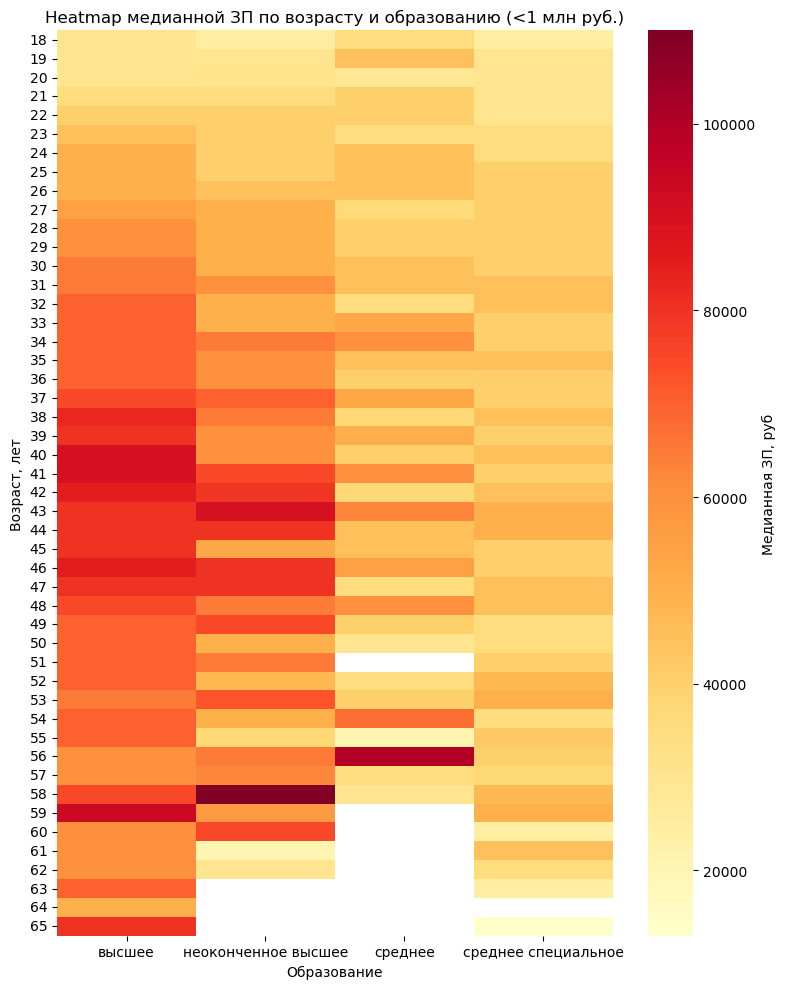

In [275]:
heatmap_source = salary_filtered[salary_filtered['Возраст'].between(18, 65)]
heatmap_data = heatmap_source.pivot_table(
    index='Возраст',
    columns='Образование',
    values='ЗП (руб)',
    aggfunc='median'
)

fig, ax = plt.subplots(figsize=(8, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Медианная ЗП, руб'})
ax.set_title('Heatmap медианной ЗП по возрасту и образованию (<1 млн руб.)')
ax.set_xlabel('Образование')
ax.set_ylabel('Возраст, лет')
plt.tight_layout()


В целом медианные ожидания выше у соискателей с высшим и неоконченным высшим образованием, наиболее высокие значения наблюдаются в возрастах 30–45 лет. Максимум на карте — 110 тыс. руб. (возраст 58, неоконченное высшее), вероятно из-за малого числа наблюдений в группе. Самый быстрый рост медианной ЗП наблюдается у категории «высшее».


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

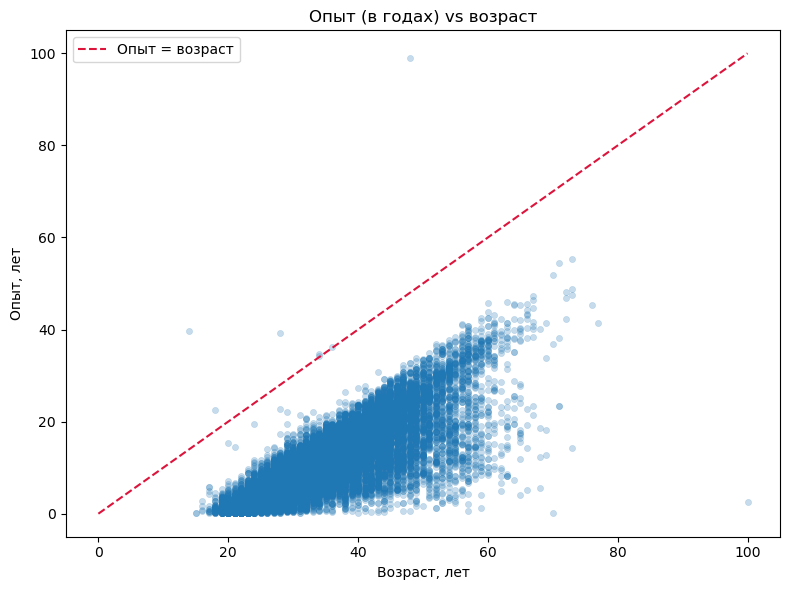

In [276]:
scatter_data = df[['Возраст', 'Опыт работы (месяц)']].dropna().copy()
scatter_data['Опыт (годы)'] = scatter_data['Опыт работы (месяц)'] / 12

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=scatter_data, x='Возраст', y='Опыт (годы)', ax=ax,
                alpha=0.25, s=20, edgecolor=None)
ax.plot([0, 100], [0, 100], color='crimson', linestyle='--', label='Опыт = возраст')
ax.set_title('Опыт (в годах) vs возраст')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Опыт, лет')
ax.legend()
plt.tight_layout()


Большинство точек лежит ниже линии «опыт = возраст», что соответствует реалистичным траекториям. Строго выше линии находится 7 резюме (опыт > возраст).


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


График 1: зарплата vs мобильность

Идея: показать, как медианная зарплата меняется в зависимости от готовности к переезду и командировкам.
​

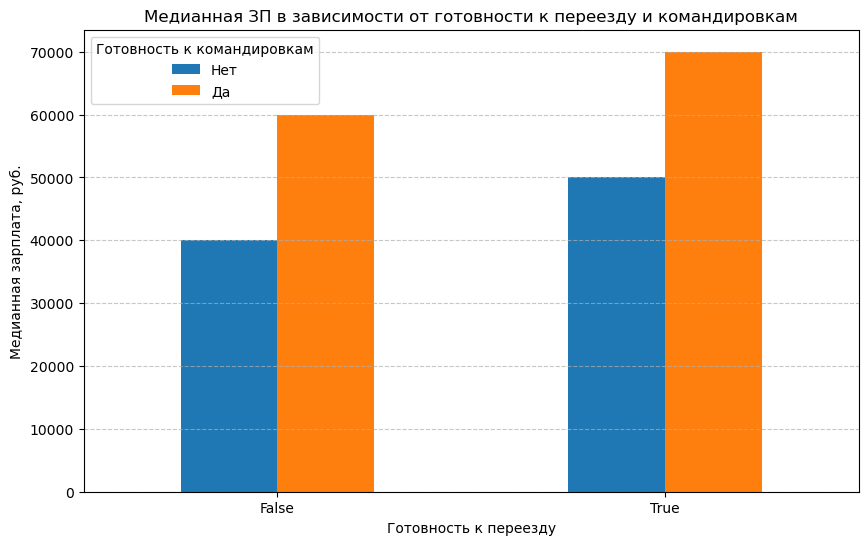

In [277]:
import matplotlib.pyplot as plt

# Группируем по двум признакам мобильности и считаем медиану ЗП
flagstats = df5.groupby(
    ['Готовность к переезду', 'Готовность к командировкам']
)['ЗП_num'].median().unstack()

# Визуализация
ax = flagstats.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_title('Медианная ЗП в зависимости от готовности к переезду и командировкам')
ax.set_xlabel('Готовность к переезду')
ax.set_ylabel('Медианная зарплата, руб.')
ax.legend(title='Готовность к командировкам', labels=['Нет', 'Да'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Выводы по графику:

Наблюдается прямая зависимость: соискатели, готовые и к переезду, и к командировкам, претендуют на самую высокую медианную зарплату.
​
Наименьшие зарплатные ожидания характерны для полностью «немобильных» кандидатов. Это подтверждает, что мобильность является значимым фактором, повышающим рыночную стоимость специалиста.


График 2: Тепловая карта «Возраст × Опыт работы»

Для этого графика используем созданные признаки Возраст и Опыт работы (месяцы). Чтобы график был читаемым, будем использовать данные без экстремальных выбросов (например, до 1 млн руб.).


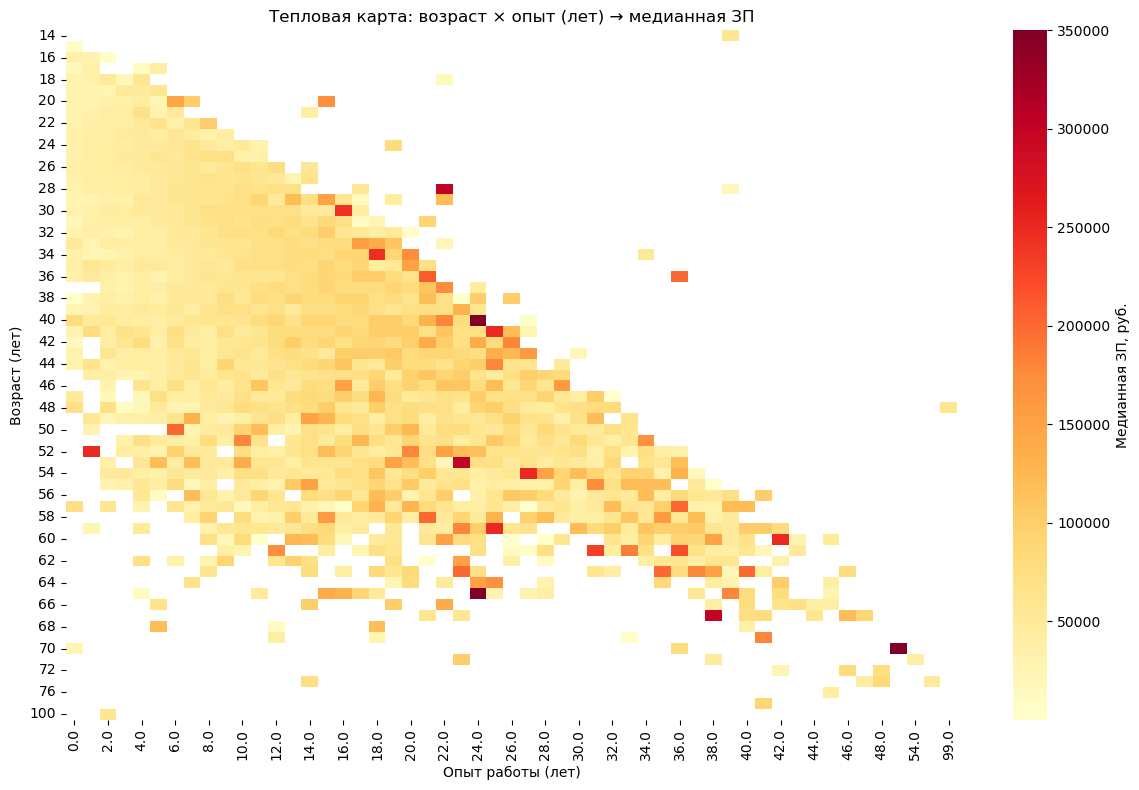

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

experience_col = 'Опыт работы (месяц)'
salary_col = 'ЗП_num'

df_heat = df5[(df5[salary_col] < 1_000_000) & df5[experience_col].notna()]

pivot_data = df_heat.pivot_table(
    index='Возраст',
    columns=(df_heat[experience_col] // 12),  # переводим месяцы в годы стажа
    values=salary_col,
    aggfunc='median'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', cbar_kws={'label': 'Медианная ЗП, руб.'})
plt.title('Тепловая карта: возраст × опыт (лет) → медианная ЗП')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Возраст (лет)')
plt.tight_layout()
plt.show()


Выводы по графику:

При увеличении и возраста, и опыта (движение к правому верхнему углу) медианная зарплата растёт, что подтверждает влияние накопленного опыта на доход.
​

В некоторых зонах (например, большой опыт при относительно небольшом возрасте) медианная зарплата выше среднего, что может отражать более квалифицированных или востребованных специалистов.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
import pandas as pd

data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

duplicates = data[data.duplicated(subset=data.columns)]

data = data.drop_duplicates()

print(duplicates.shape[0])

153


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
null_data = data.isnull().sum()
display(null_data[null_data > 0])


Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [290]:

print("Пропуски до обработки:")
display(data.isnull().sum())

data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

print("\nРазмер данных после удаления строк с пропусками в работе и должности:")
print(f"Строк: {len(data)}")

exp_null_count = data['Опыт работы'].isnull().sum()
print(f"\nПропусков в столбце 'Опыт работы': {exp_null_count}")

print("\nПропуски после обработки:")
display(data.isnull().sum())


Пропуски до обработки:


Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        166
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64


Размер данных после удаления строк с пропусками в работе и должности:
Строк: 44589

Пропусков в столбце 'Опыт работы': 166

Пропуски после обработки:


Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        166
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [288]:
salary_mask = df['ЗП (руб)'].between(1_000, 1_000_000)
removed = (~salary_mask).sum()
df = df.loc[salary_mask].copy()

print(f'Удалено записей с ЗП вне [1 тыс.; 1 млн]: {removed}')
print(f'Оставшийся размер: {df.shape[0]}')


Удалено записей с ЗП вне [1 тыс.; 1 млн]: 89
Оставшийся размер: 44655


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [291]:
experience_years = df['Опыт работы (месяц)'] / 12
anomaly_mask = experience_years.notna() & df['Возраст'].notna() & (experience_years >= df['Возраст'])
removed = anomaly_mask.sum()
df = df.loc[~anomaly_mask].copy()

print(f'Удалено записей с опытом >= возрасту: {removed}')
print(f'Размер после фильтра: {df.shape[0]}')


Удалено записей с опытом >= возрасту: 7
Размер после фильтра: 44648


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Выбросов по правилу 4σ вправо: 1


,Возраст,ЗП (руб),Опыт работы (месяц)
33654,100,60000.0,30.0


Размер после удаления выбросов возраста: 44647


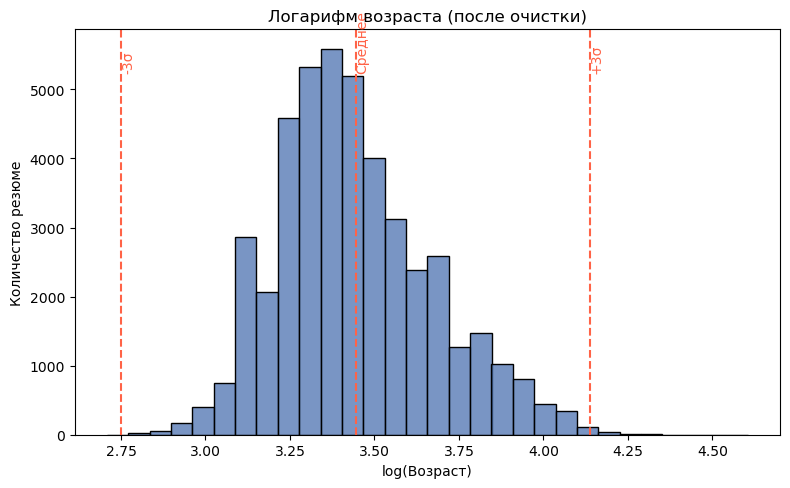

In [292]:
age_series = df['Возраст'].dropna()
log_age = np.log(age_series)
log_age = log_age.replace([np.inf, -np.inf], np.nan).dropna()

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(log_age, bins=30, ax=ax, color='#4C72B0')
ax.set_title('Логарифм возраста (после очистки)')
ax.set_xlabel('log(Возраст)')
ax.set_ylabel('Количество резюме')

mean = log_age.mean()
std = log_age.std(ddof=0)
for value, label in [(mean, 'Среднее'), (mean - 3*std, '-3σ'), (mean + 3*std, '+3σ')]:
    ax.axvline(value, color='tomato', linestyle='--')
    ax.text(value, ax.get_ylim()[1]*0.9, label, rotation=90, color='tomato')

plt.tight_layout()

z_scores = (log_age - mean) / std
outlier_idx = z_scores[z_scores > 4].index
outliers = df.loc[outlier_idx, ['Возраст', 'ЗП (руб)', 'Опыт работы (месяц)']]

print(f'Выбросов по правилу 4σ вправо: {len(outliers)}')
display(outliers)

df = df.drop(index=outlier_idx)
print(f'Размер после удаления выбросов возраста: {df.shape[0]}')


Логарифм возраста асимметричен вправо: основная масса сосредоточена в районе 20–50 лет, а редкие пожилые кандидаты формируют длинный хвост. По правилу 4σ вправо выбросом оказалось одно резюме (100 лет), его удалили.
